Below is a brief tutorial on how to use RFMs.  

We provide an implementation of RFMs to fit the following dataset.

In [1]:
import numpy as np

# Don't forget to set your random seeds so that experiments are all reproducible
SEED = 1717
np.random.seed(SEED)

d = 100

def sample_data(num_samples):
    X = np.random.normal(size=(num_samples, d))
    y = X[:, 0] * X[:, 1]
    return X, y.reshape(-1, 1)

n_train, n_test = 2000, 10000
X_train, y_train = sample_data(n_train)
X_test, y_test = sample_data(n_test)

To train an RFM: 

1.  Create a model object using the constructor ```RFM()```.
2.  Run ```model.fit()```.  

This function requires training inputs (X_train) and training labels (y_train).  The optional arguments are as follows: 

1. ```num_iters```: The number of iterations of running the RFM algorithm (usually 1 or 2 iterations is sufficient). 
2. ```reg```: The amount of ridge regularization to use when solving kernel regression at each step. Smaller values will lead to fitting training data more accurately. 
3. ```centering```:  Whether to center gradients before computing the expected gradient outer product (recommend setting this to True). 
4. ```verbose```: Print time per computation when running RFMs. 
5. ```diag_only```: Whether to only keep of diagonal entries when updating the feature matrix (recommend setting this to False unless input dimension is very high (greater than 20k).  

In [8]:
import rfm  


# Data should come in as numpy arrays.  
# X_train: (num training samples, num features)
# y_train: (num training samples, num labels/classes)

model = rfm.RFM()
model = model.fit(X_train, y_train, num_iters=5, reg=1e-4, 
                  centering=True, verbose=False, diag_only=False)

In [9]:
from sklearn.metrics import r2_score

rfm_train_preds = model.predict(X_train)
rfm_test_preds = model.predict(X_test)
rfm_train_r2 = r2_score(y_train, rfm_train_preds)
rfm_test_r2 = r2_score(y_test, rfm_test_preds)
print("Train R2: ", rfm_train_r2, "Test R2: ", rfm_test_r2)

Train R2:  0.999996752594814 Test R2:  0.9231449905104399


After training, you can use the ```model.get_M()``` function to get a matrix that shows which features are most relevant for prediction.  Below, we will see that only the top two diagonal elements are highlighted, indicating that these are the most important feautres.  This makes sense since our target function is of the form $f^*(x) = x_1 x_2$. 

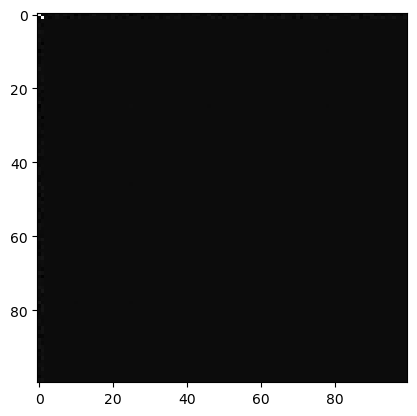

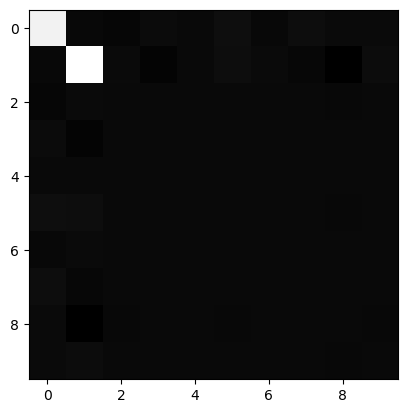

In [11]:
import matplotlib.pyplot as plt

M = model.get_M()
plt.imshow(M, cmap='gray')
plt.show()

plt.imshow(M[:10, :10], cmap='gray')
plt.show()